In [2]:
%load_ext autoreload
%autoreload 2
# %load_ext lab_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize
from utils.constants import NEG_CLASS

## Parameters

In [4]:
data_folder = "data/mvtec_anomaly_detection"
subset_name = "leather"
data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 10
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 5

# Data

In [5]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset data/mvtec_anomaly_detection\leather: N Images = 369, Share of anomalies = 0.249


# Model Training

In [6]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\asus/.cache\torch\hub\checkpoints\vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [7]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy
)

Epoch 1/10: Loss = 0.6119, Accuracy = 0.7034
Epoch 2/10: Loss = 0.2595, Accuracy = 0.8931
Epoch 3/10: Loss = 0.1567, Accuracy = 0.9414
Epoch 4/10: Loss = 0.2085, Accuracy = 0.9276
Epoch 5/10: Loss = 0.1510, Accuracy = 0.9207
Epoch 6/10: Loss = 0.1037, Accuracy = 0.9552
Epoch 7/10: Loss = 0.1099, Accuracy = 0.9552
Epoch 8/10: Loss = 0.0722, Accuracy = 0.9655
Epoch 9/10: Loss = 0.1120, Accuracy = 0.9552
Epoch 10/10: Loss = 0.0607, Accuracy = 0.9759


In [8]:
model_path = f"weights/{subset_name}_model.h5"
torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

# Evaluation

Accuracy: 0.9595
Balanced Accuracy: 0.9383



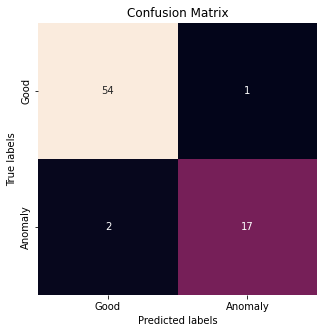

In [9]:
evaluate(model, test_loader, device)

# Cross Validation

Dataset data/mvtec_anomaly_detection\leather: N Images = 369, Share of anomalies = 0.249
Fold 1/5


C:\Users\asus\AppData\Local\Temp\ipykernel_16880\481390705.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.5316, Accuracy = 0.8276
Epoch 2/10: Loss = 0.2756, Accuracy = 0.8862
Epoch 3/10: Loss = 0.1849, Accuracy = 0.9345
Epoch 4/10: Loss = 0.1690, Accuracy = 0.9310
Epoch 5/10: Loss = 0.1061, Accuracy = 0.9621
Epoch 6/10: Loss = 0.1330, Accuracy = 0.9379
Epoch 7/10: Loss = 0.1247, Accuracy = 0.9655
Epoch 8/10: Loss = 0.0846, Accuracy = 0.9621
Epoch 9/10: Loss = 0.0653, Accuracy = 0.9828
Epoch 10/10: Loss = 0.0687, Accuracy = 0.9793
Accuracy: 1.0000
Balanced Accuracy: 1.0000



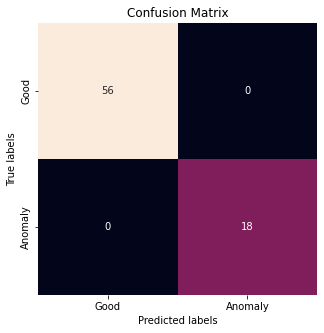

Fold 2/5


C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.5284, Accuracy = 0.7724
Epoch 2/10: Loss = 0.2593, Accuracy = 0.9000
Epoch 3/10: Loss = 0.2052, Accuracy = 0.9172
Epoch 4/10: Loss = 0.1196, Accuracy = 0.9483
Epoch 5/10: Loss = 0.1675, Accuracy = 0.9448
Epoch 6/10: Loss = 0.1229, Accuracy = 0.9517
Epoch 7/10: Loss = 0.1181, Accuracy = 0.9552
Epoch 8/10: Loss = 0.0578, Accuracy = 0.9828
Epoch 9/10: Loss = 0.1025, Accuracy = 0.9621
Epoch 10/10: Loss = 0.0639, Accuracy = 0.9724
Accuracy: 0.9730
Balanced Accuracy: 0.9444



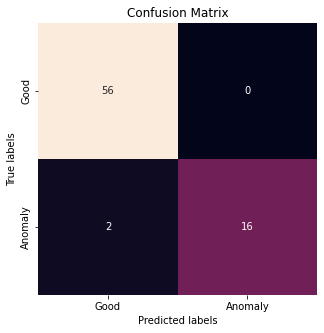

Fold 3/5


C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.6072, Accuracy = 0.7448
Epoch 2/10: Loss = 0.2731, Accuracy = 0.9034
Epoch 3/10: Loss = 0.1911, Accuracy = 0.9483
Epoch 4/10: Loss = 0.1286, Accuracy = 0.9448
Epoch 5/10: Loss = 0.0918, Accuracy = 0.9586
Epoch 6/10: Loss = 0.0879, Accuracy = 0.9621
Epoch 7/10: Loss = 0.0761, Accuracy = 0.9690
Epoch 8/10: Loss = 0.0566, Accuracy = 0.9759
Epoch 9/10: Loss = 0.0390, Accuracy = 0.9897
Epoch 10/10: Loss = 0.1594, Accuracy = 0.9276
Accuracy: 0.9595
Balanced Accuracy: 0.9211



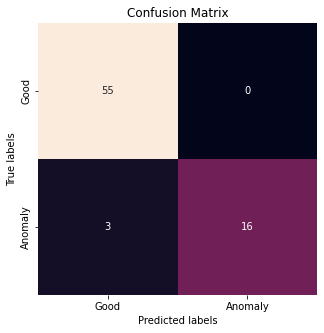

Fold 4/5


C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.5295, Accuracy = 0.6793
Epoch 2/10: Loss = 0.2305, Accuracy = 0.9241
Epoch 3/10: Loss = 0.1578, Accuracy = 0.9517
Epoch 4/10: Loss = 0.1896, Accuracy = 0.9345
Epoch 5/10: Loss = 0.1124, Accuracy = 0.9586
Epoch 6/10: Loss = 0.1019, Accuracy = 0.9586
Epoch 7/10: Loss = 0.1110, Accuracy = 0.9690
Epoch 8/10: Loss = 0.0527, Accuracy = 0.9828
Epoch 9/10: Loss = 0.0961, Accuracy = 0.9690
Epoch 10/10: Loss = 0.1838, Accuracy = 0.9586
Accuracy: 0.9730
Balanced Accuracy: 0.9474



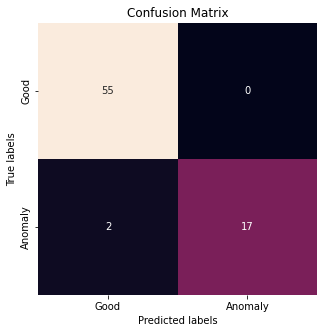

Fold 5/5


C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.4867, Accuracy = 0.8207
Epoch 2/10: Loss = 0.1651, Accuracy = 0.9552
Epoch 3/10: Loss = 0.0916, Accuracy = 0.9655
Epoch 4/10: Loss = 0.0632, Accuracy = 0.9828
Epoch 5/10: Loss = 0.0538, Accuracy = 0.9724
Epoch 6/10: Loss = 0.0504, Accuracy = 0.9862
Epoch 7/10: Loss = 0.0353, Accuracy = 0.9897
Epoch 8/10: Loss = 0.0359, Accuracy = 0.9862
Epoch 9/10: Loss = 0.0099, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0049, Accuracy = 0.9966
Accuracy: 0.5890
Balanced Accuracy: 0.7273



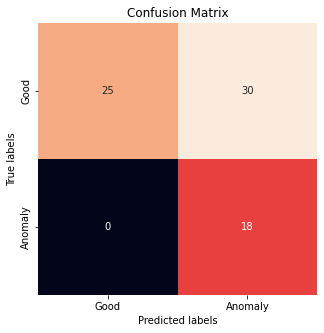

In [14]:
# takes a lot of time
cv_folds = get_cv_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    n_folds=n_cv_folds,
)

input_size=2
class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    model = CustomVGG(input_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device)
    evaluate(model, test_loader, device)

# Visualization

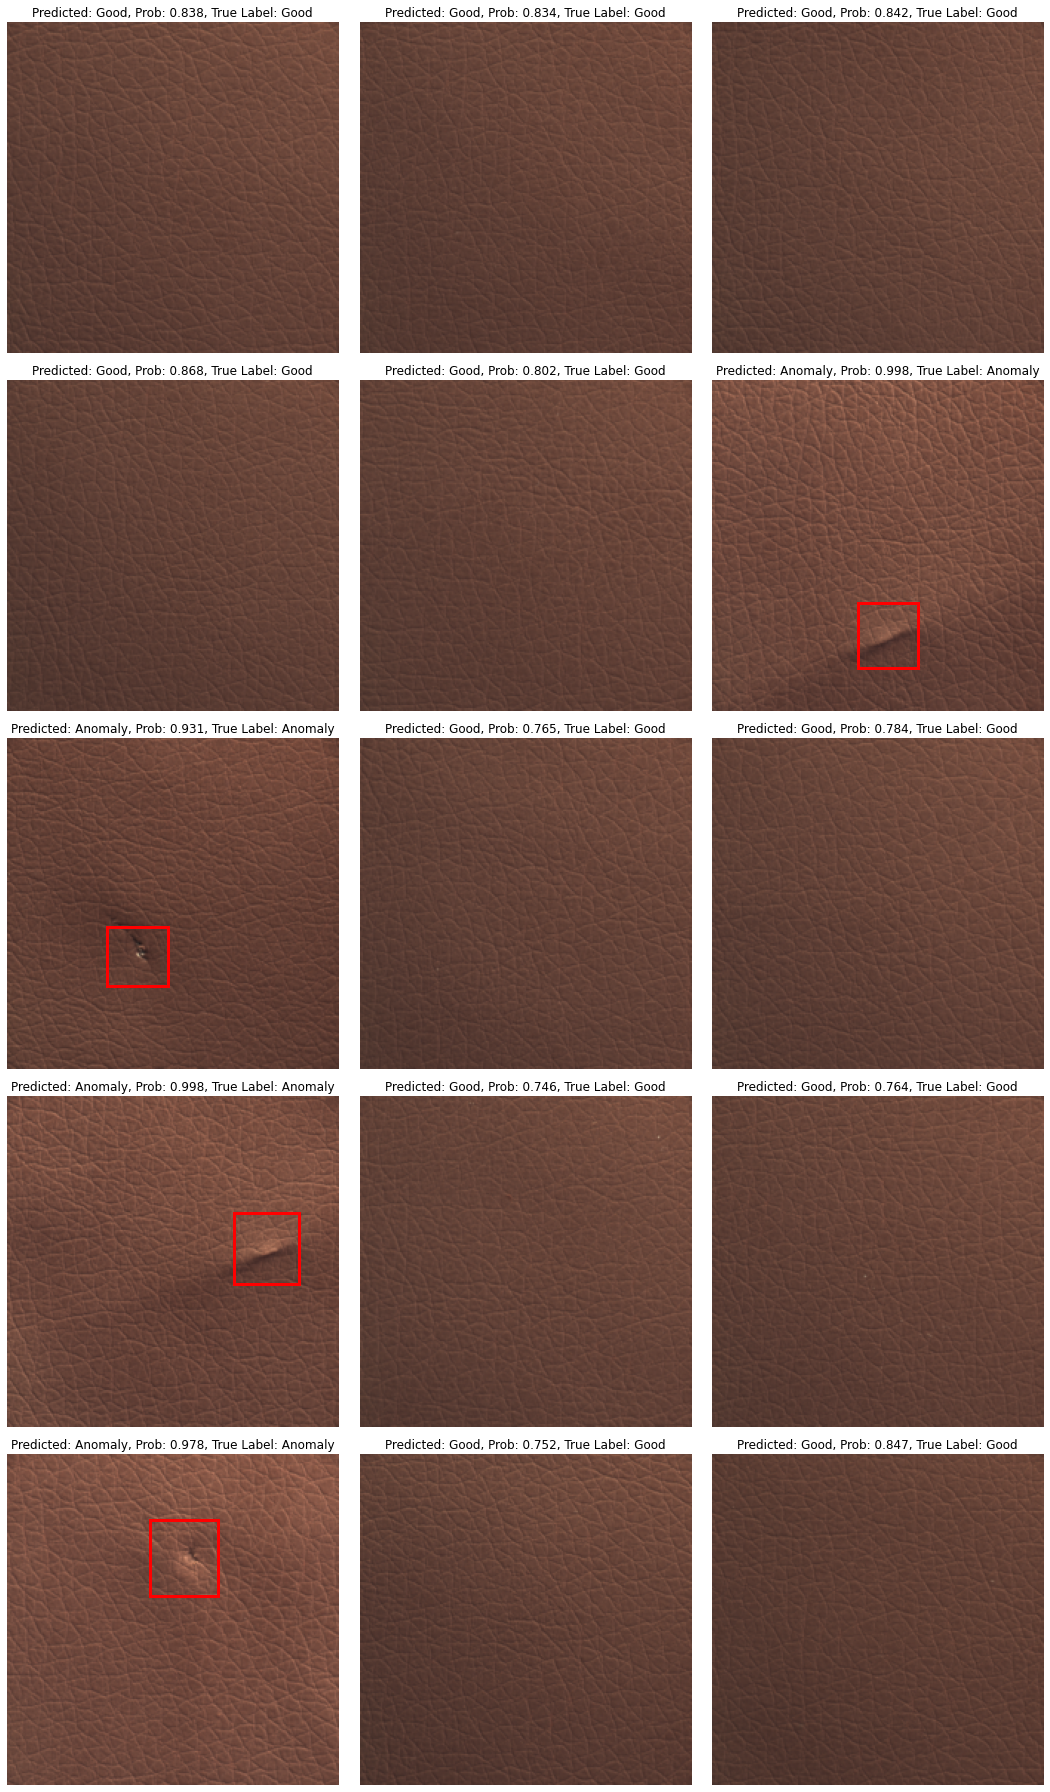

In [13]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)